___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [6]:
df0 = pd.read_csv("heart.csv")

In [7]:
df = df0.copy()

# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [16]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
247,66,1,1,160,246,0,1,120,1,0.000,1,3,1,0
123,54,0,2,108,267,0,0,167,0,0.000,2,0,2,1
289,55,0,0,128,205,0,2,130,1,2.000,1,1,3,0
180,55,1,0,132,353,0,1,132,1,1.200,1,1,3,0
69,62,0,0,124,209,0,1,163,0,0.000,2,0,2,1
127,67,0,2,152,277,0,1,172,0,0.000,2,1,2,1
112,64,0,2,140,313,0,1,133,0,0.200,2,0,3,1
292,58,0,0,170,225,1,0,146,1,2.800,1,2,1,0
202,58,1,0,150,270,0,0,111,1,0.800,2,0,3,0
78,52,1,1,128,205,1,1,184,0,0.000,2,0,2,1


In [11]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

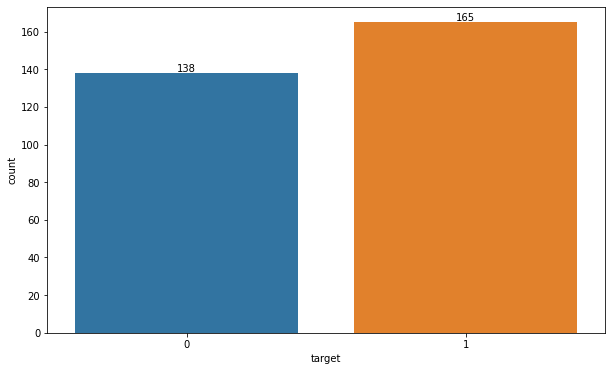

In [12]:
# Imbalance(Dengesizlik) var mi yok mu skorlara bakacagiz.
ax = sns.countplot(df.target)
ax.bar_label(ax.containers[0]);

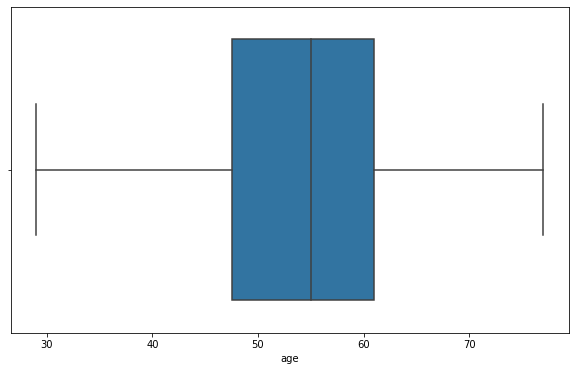

In [14]:
sns.boxplot(df.age);

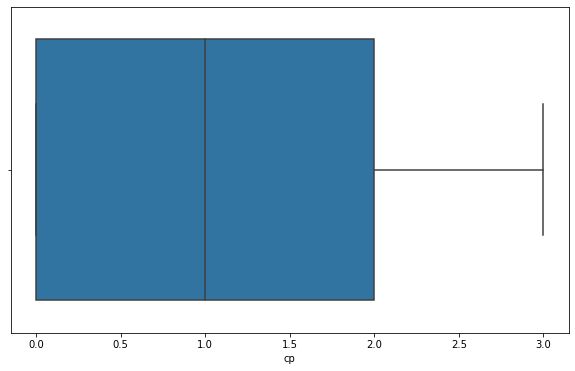

In [17]:
sns.boxplot(df.cp);

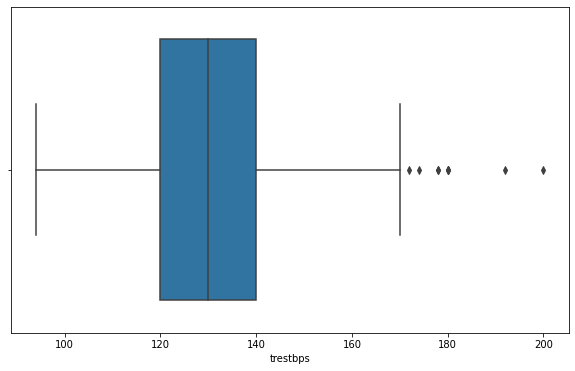

In [18]:
sns.boxplot(df.trestbps);

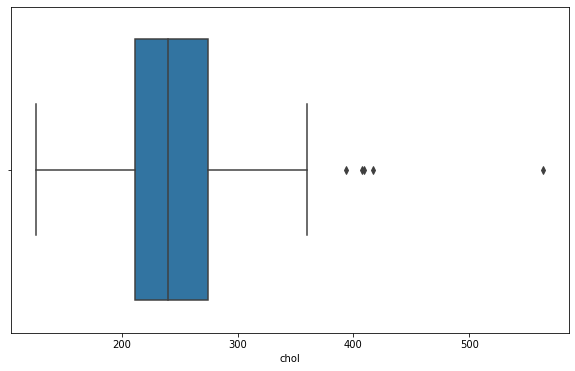

In [19]:
sns.boxplot(df.chol);

In [20]:
df=df[df.chol<500]

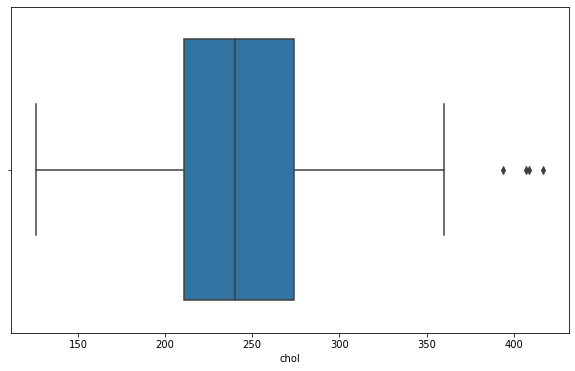

In [21]:
sns.boxplot(df.chol);

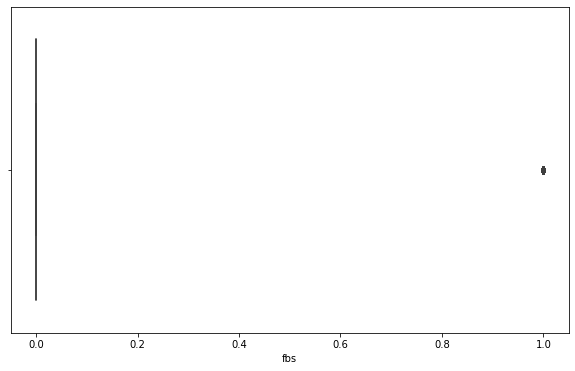

In [22]:
sns.boxplot(df.fbs);

In [23]:
df.fbs.value_counts()

0    257
1     45
Name: fbs, dtype: int64

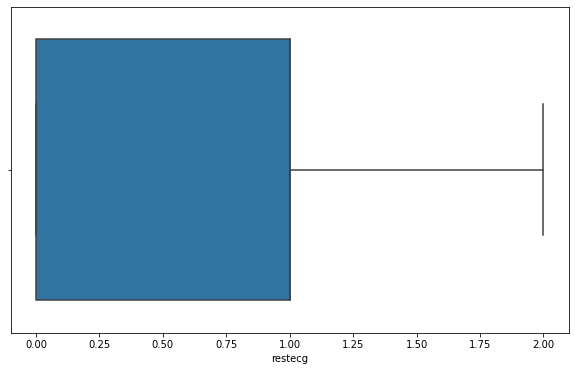

In [24]:
sns.boxplot(df.restecg);

In [25]:
df.restecg.value_counts()

1    152
0    146
2      4
Name: restecg, dtype: int64

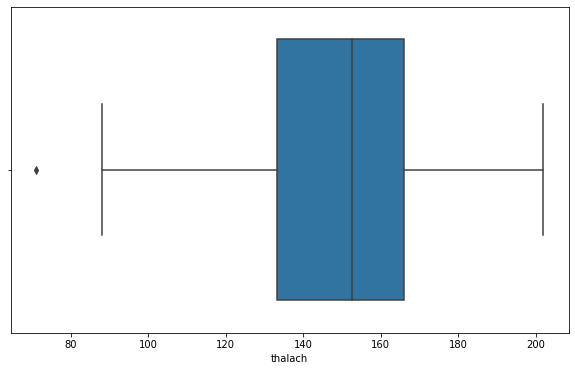

In [26]:
sns.boxplot(df.thalach);

In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

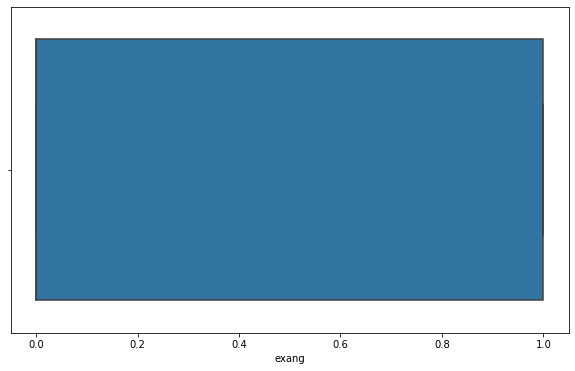

In [29]:
sns.boxplot(df.exang);

In [30]:
df.exang.value_counts()

0    203
1     99
Name: exang, dtype: int64

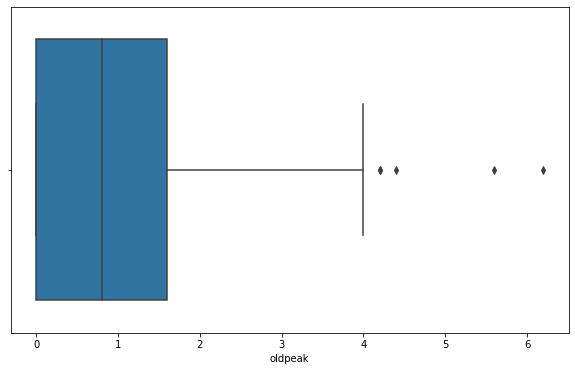

In [31]:
sns.boxplot(df.oldpeak);

In [32]:
df.oldpeak.value_counts()

0.000    99
1.200    17
1.000    14
0.600    14
1.400    13
0.800    13
0.200    12
1.800    10
1.600    10
0.400     9
2.000     9
0.100     7
2.800     6
2.600     6
1.500     5
3.000     5
1.900     5
0.500     5
3.600     4
2.200     4
2.400     3
0.900     3
3.400     3
4.000     3
0.300     3
2.300     2
3.200     2
2.500     2
4.200     2
1.100     2
3.100     1
0.700     1
3.500     1
6.200     1
1.300     1
5.600     1
2.900     1
2.100     1
3.800     1
4.400     1
Name: oldpeak, dtype: int64

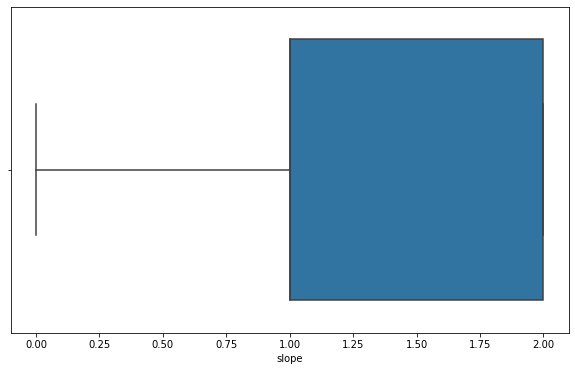

In [33]:
sns.boxplot(df.slope);

In [34]:
df.slope.value_counts()

2    142
1    139
0     21
Name: slope, dtype: int64

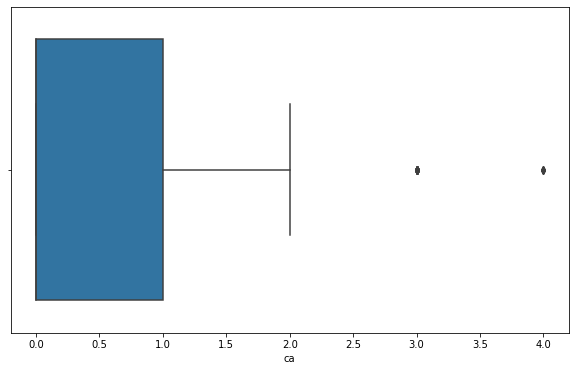

In [35]:
sns.boxplot(df.ca);

In [36]:
df.ca.value_counts()

0    174
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

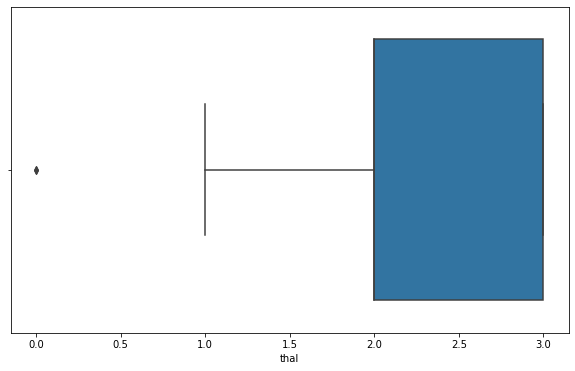

In [37]:
sns.boxplot(df.thal);

In [38]:
df.thal.value_counts()

2    166
3    116
1     18
0      2
Name: thal, dtype: int64

In [42]:
df.shape

(302, 14)

# Data Preprocessing

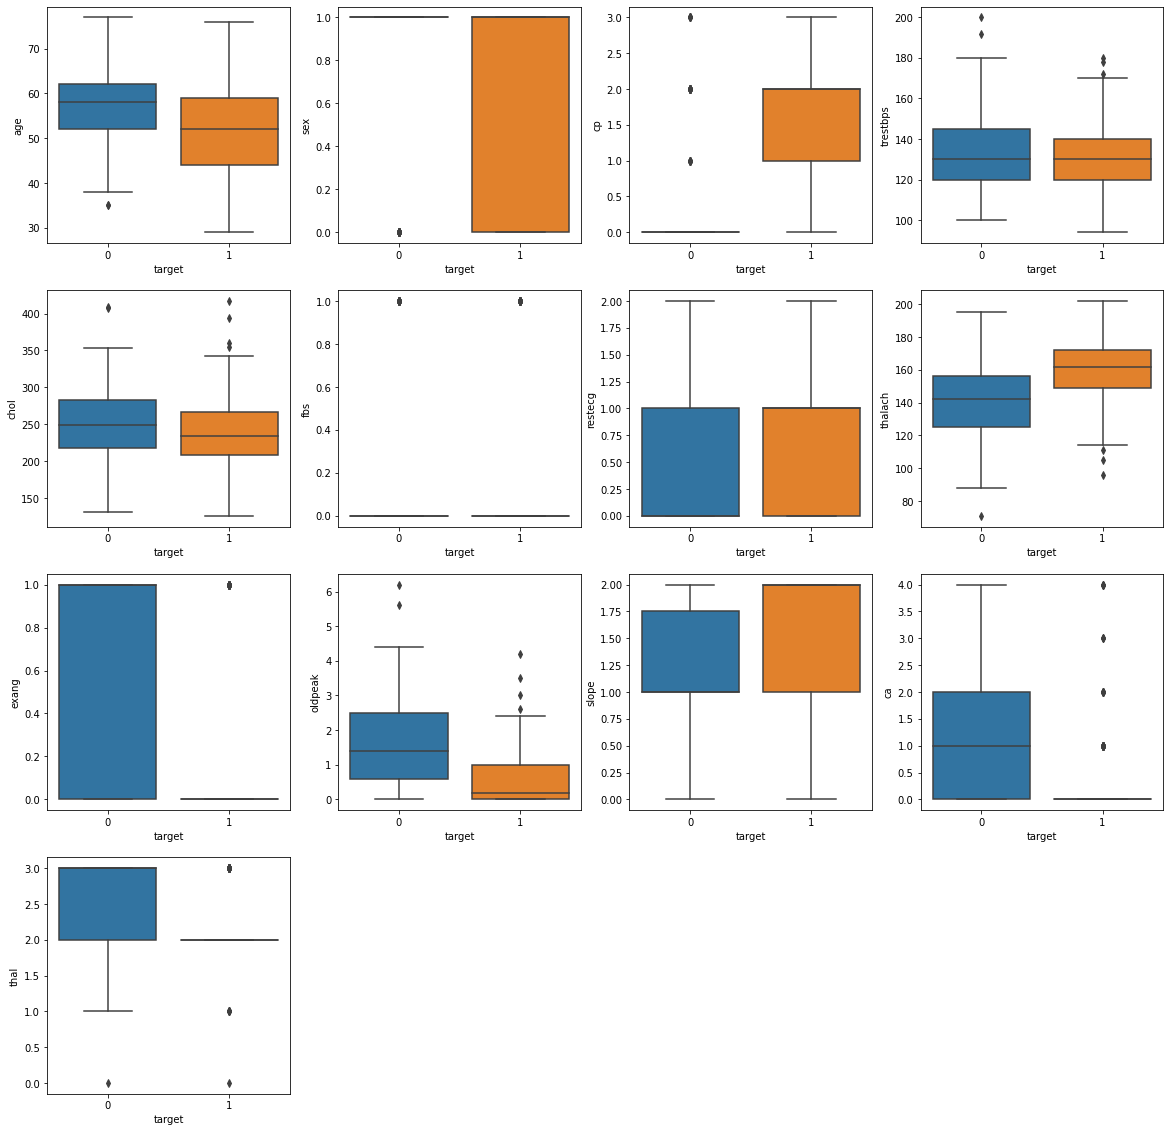

In [46]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='target',y=feature, data=df)

<AxesSubplot:>

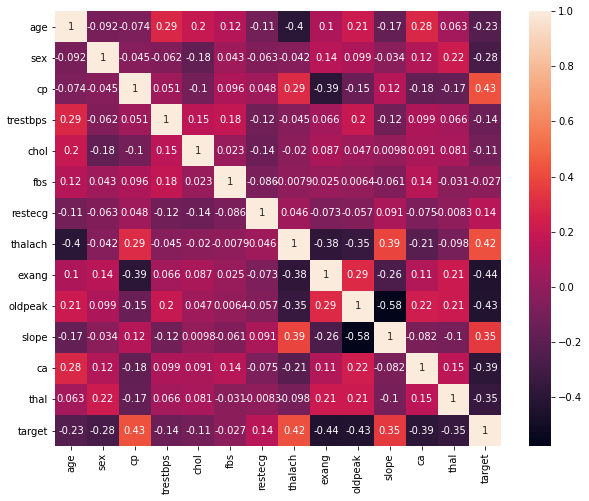

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

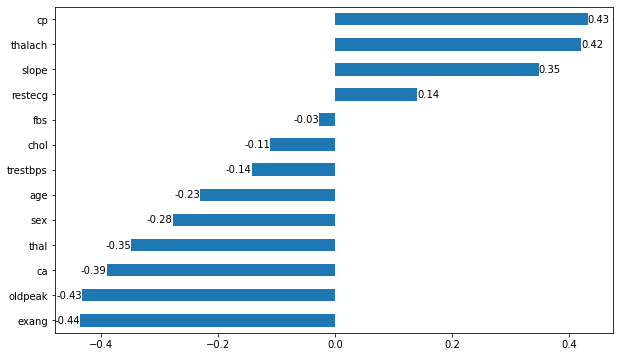

In [48]:
ax = df.corr()["target"].drop("target").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

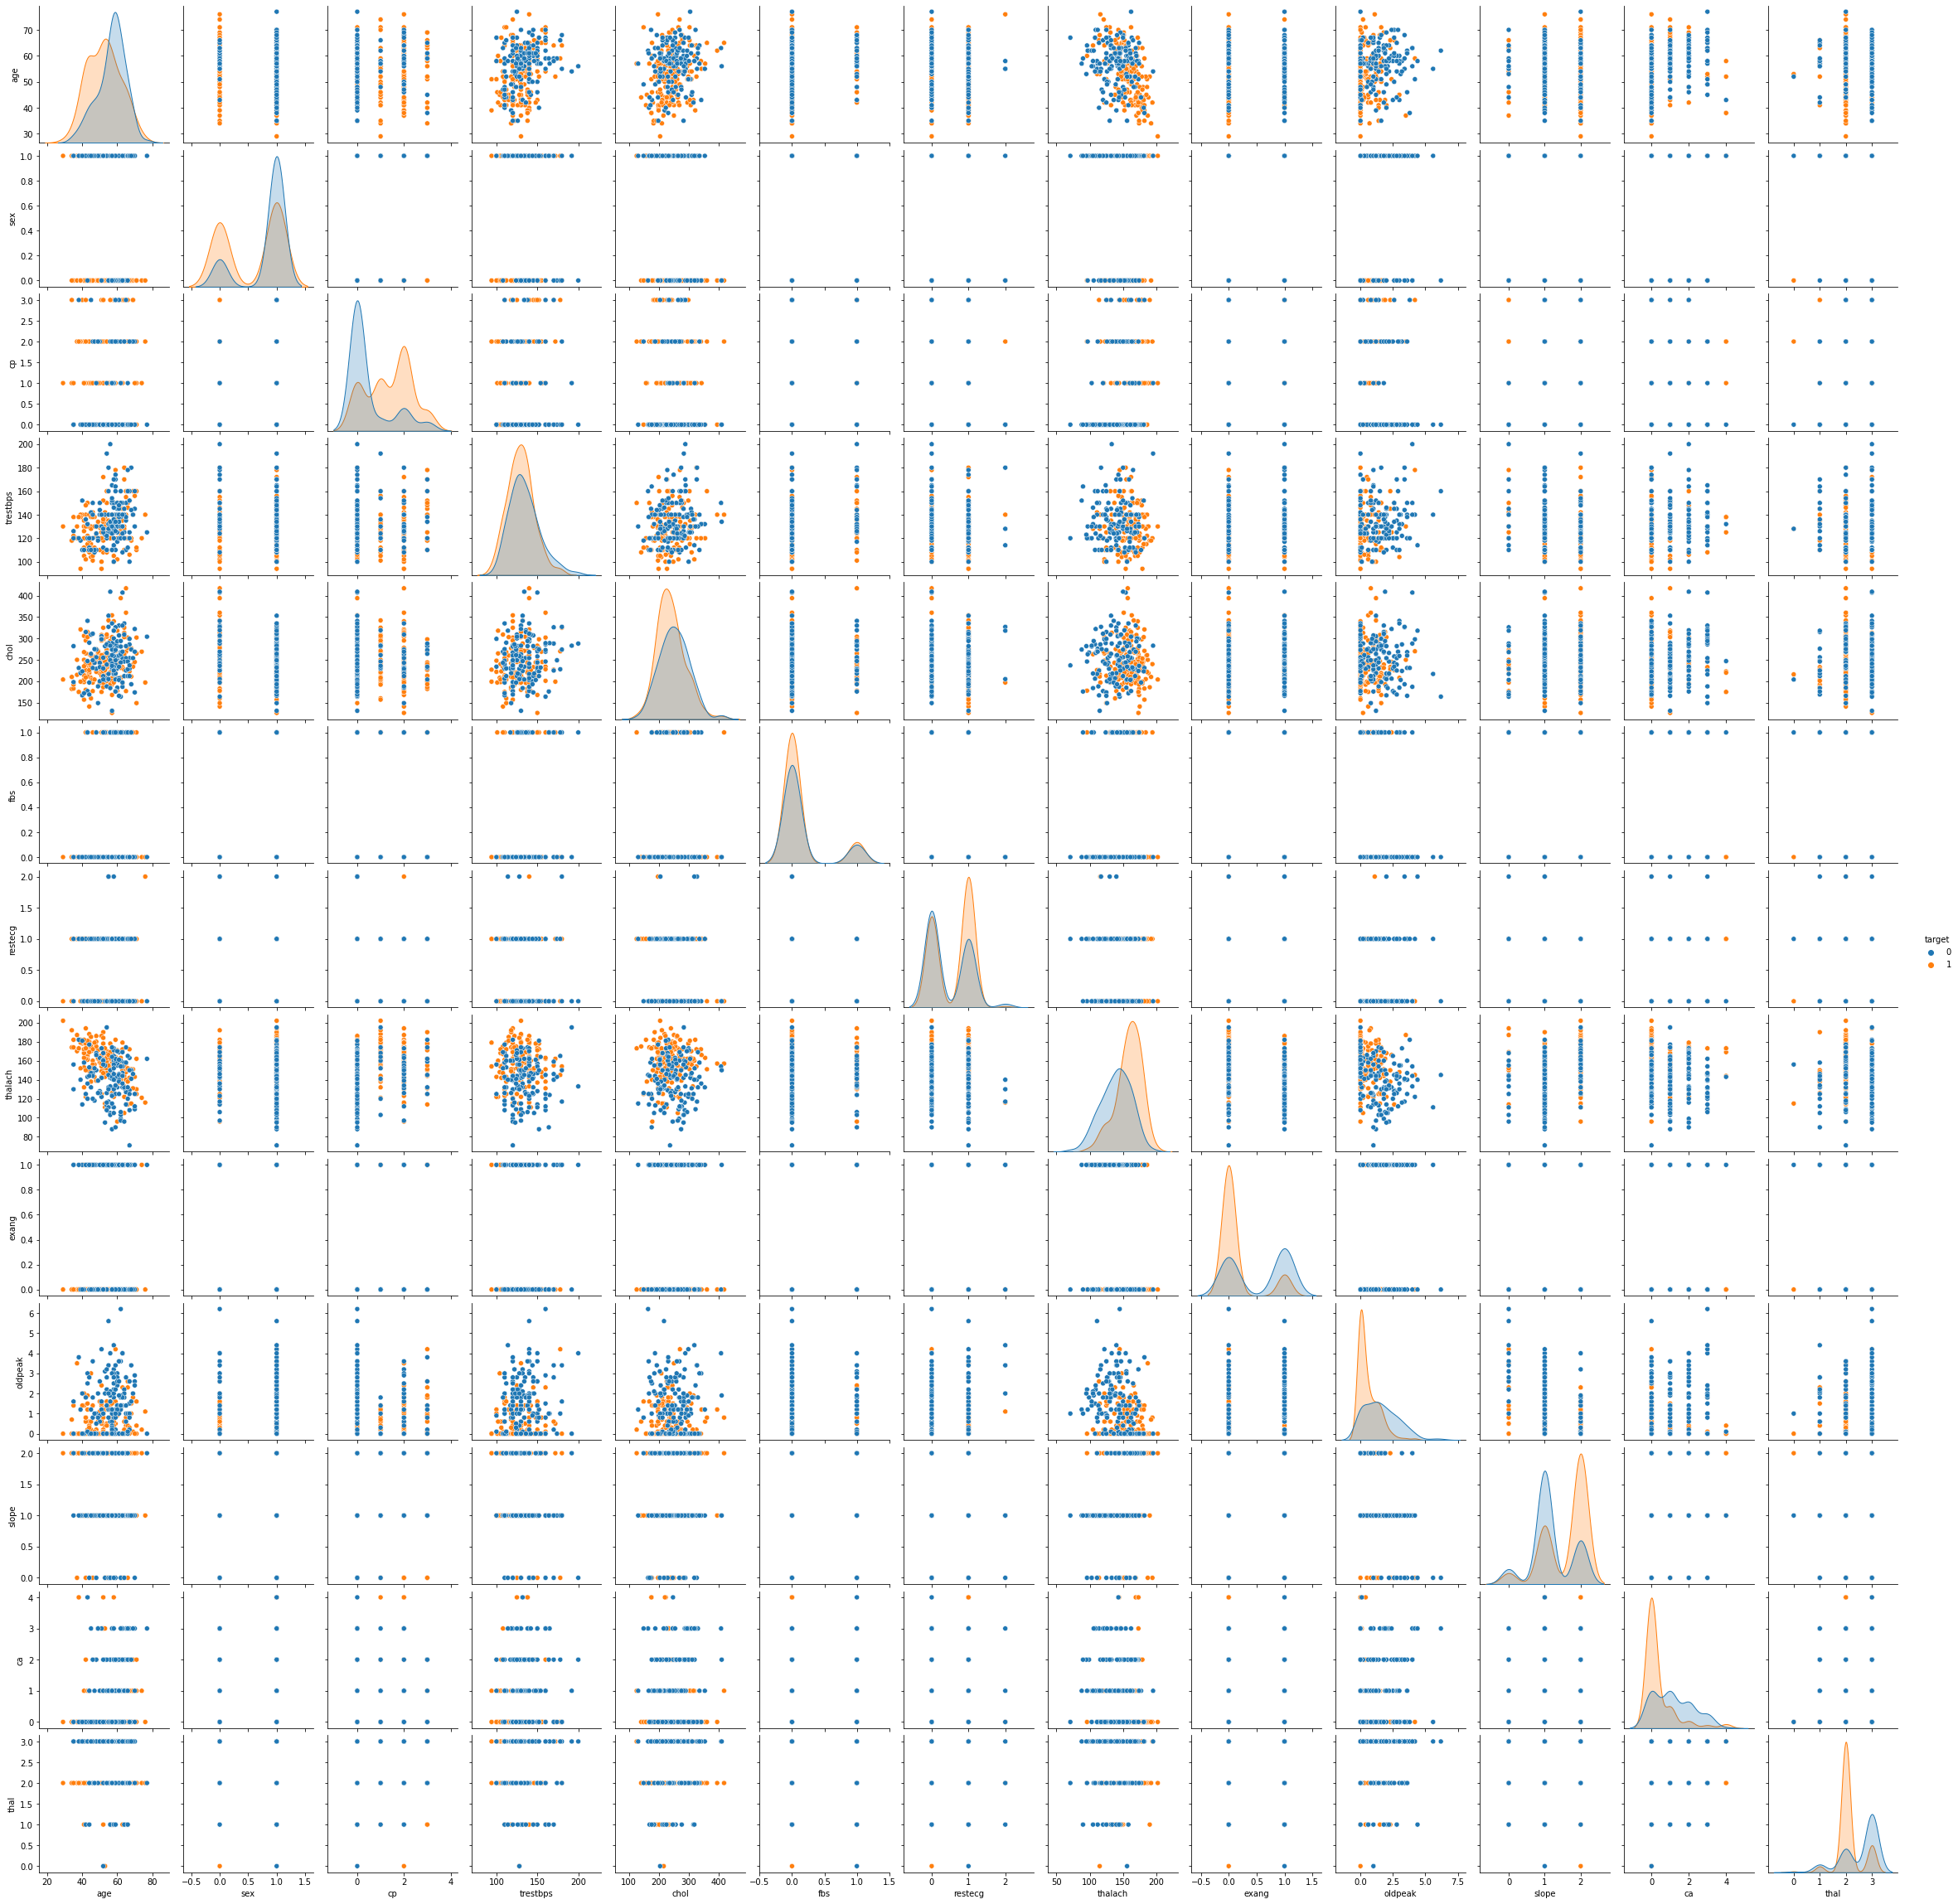

In [49]:
sns.pairplot(df, hue = "target");0

# Implement Logistic Regression and Evaluate

In [50]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [53]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

1    131
0    110
Name: target, dtype: int64

1    33
0    28
Name: target, dtype: int64


In [54]:
scaler = StandardScaler()

In [55]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_model=LogisticRegression()

In [58]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [59]:
y_pred=log_model.predict(X_test_scaled)

In [60]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [61]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
51,66,1,0,120,302,0,0,151,0,0.400,1,0,2,1,0,0.278
136,60,0,2,120,178,1,1,96,0,0.000,2,0,2,1,1,0.983
286,59,1,3,134,204,0,1,162,0,0.800,2,2,2,0,1,0.942
217,63,1,0,130,330,1,0,132,1,1.800,2,3,3,0,0,0.003
271,61,1,3,134,234,0,1,145,0,2.600,1,2,2,0,1,0.573
186,60,1,0,130,253,0,1,144,1,1.400,2,1,3,0,0,0.072
131,49,0,1,134,271,0,1,162,0,0.000,1,0,2,1,1,0.941
44,39,1,2,140,321,0,0,182,0,0.000,2,0,2,1,1,0.896
61,54,1,1,108,309,0,1,156,0,0.000,2,0,3,1,1,0.587
236,58,1,0,125,300,0,0,171,0,0.000,2,2,3,0,0,0.147


In [62]:
log_model.coef_

array([[-0.11969016, -0.74705053,  0.90921842, -0.2139625 , -0.61026921,
        -0.10226904,  0.15929867,  0.39656213, -0.36230457, -0.76318934,
         0.38166256, -0.53999769, -0.648172  ]])

In [63]:
log_model.intercept_

array([0.11313424])

In [64]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [65]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.86843058, 0.13156942],
       [0.8980649 , 0.1019351 ],
       [0.99378007, 0.00621993],
       [0.34742661, 0.65257339],
       [0.37309265, 0.62690735],
       [0.97346449, 0.02653551],
       [0.56902334, 0.43097666],
       [0.9334153 , 0.0665847 ],
       [0.1809296 , 0.8190704 ],
       [0.34810298, 0.65189702],
       [0.75897059, 0.24102941],
       [0.03943512, 0.96056488],
       [0.90916888, 0.09083112],
       [0.31180529, 0.68819471],
       [0.05920363, 0.94079637],
       [0.93496274, 0.06503726],
       [0.04215384, 0.95784616],
       [0.25890925, 0.74109075],
       [0.40722791, 0.59277209],
       [0.21199466, 0.78800534],
       [0.18777203, 0.81222797],
       [0.93930406, 0.06069594],
       [0.04106845, 0.95893155],
       [0.07157596, 0.92842404],
       [0.09728305, 0.90271695],
       [0.99205777, 0.00794223],
       [0.77287158, 0.22712842],
       [0.00711694, 0.99288306],
       [0.77143642, 0.22856358],
       [0.14893902, 0.85106098],
       [0.

In [66]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.600,1,1,1,0
197,67,1,0,125,254,1,1,163,0,0.200,1,2,3,0
285,46,1,0,140,311,0,1,120,1,1.800,1,2,3,0
194,60,1,2,140,185,0,0,155,0,3.000,1,0,2,0
188,50,1,2,140,233,0,1,163,0,0.600,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,58,0,3,150,283,1,0,162,0,1.000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
224,54,1,0,110,239,0,1,126,1,2.800,1,1,3,0
202,58,1,0,150,270,0,0,111,1,0.800,2,0,3,0


In [67]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba
179,57,1,0,150,276,0,0,112,1,0.600,1,1,1,0,0.132
197,67,1,0,125,254,1,1,163,0,0.200,1,2,3,0,0.102
285,46,1,0,140,311,0,1,120,1,1.800,1,2,3,0,0.006
194,60,1,2,140,185,0,0,155,0,3.000,1,0,2,0,0.653
188,50,1,2,140,233,0,1,163,0,0.600,1,1,3,0,0.627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,58,0,3,150,283,1,0,162,0,1.000,2,0,2,1,0.970
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1,0.583
224,54,1,0,110,239,0,1,126,1,2.800,1,1,3,0,0.020
202,58,1,0,150,270,0,0,111,1,0.800,2,0,3,0,0.048


In [68]:
test_data["pred"] = y_pred
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
179,57,1,0,150,276,0,0,112,1,0.600,1,1,1,0,0.132,0
197,67,1,0,125,254,1,1,163,0,0.200,1,2,3,0,0.102,0
285,46,1,0,140,311,0,1,120,1,1.800,1,2,3,0,0.006,0
194,60,1,2,140,185,0,0,155,0,3.000,1,0,2,0,0.653,1
188,50,1,2,140,233,0,1,163,0,0.600,1,1,3,0,0.627,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,58,0,3,150,283,1,0,162,0,1.000,2,0,2,1,0.970,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1,0.583,1
224,54,1,0,110,239,0,1,126,1,2.800,1,1,3,0,0.020,0
202,58,1,0,150,270,0,0,111,1,0.800,2,0,3,0,0.048,0


In [69]:
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
108,50,0,1,120,244,0,1,162,0,1.100,2,0,2,1,0.961,1
83,52,1,3,152,298,1,1,178,0,1.200,1,0,3,1,0.623,1
44,39,1,2,140,321,0,0,182,0,0.000,2,0,2,1,0.896,1
70,54,1,2,120,258,0,0,147,0,0.400,1,0,3,1,0.608,1
142,42,0,2,120,209,0,1,173,0,0.000,1,0,2,1,0.993,1
252,62,0,0,138,294,1,1,106,0,1.900,1,3,2,0,0.061,0
35,46,0,2,142,177,0,0,160,1,1.400,0,0,2,1,0.903,1
43,53,0,0,130,264,0,0,143,0,0.400,1,0,2,1,0.741,1
236,58,1,0,125,300,0,0,171,0,0.000,2,2,3,0,0.147,0
268,54,1,0,122,286,0,0,116,1,3.200,1,2,2,0,0.008,0


In [71]:
test_data[test_data['target'] != test_data['pred']]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
194,60,1,2,140,185,0,0,155,0,3.000,1,0,2,0,0.653,1
188,50,1,2,140,233,0,1,163,0,0.600,1,1,3,0,0.627,1
141,43,1,0,115,303,0,1,181,0,1.200,1,0,2,1,0.431,0
228,59,1,3,170,288,0,0,159,0,0.200,1,0,3,0,0.652,1
96,62,0,0,140,394,0,0,157,0,1.200,1,0,2,1,0.241,0
101,59,1,3,178,270,0,0,145,0,4.200,0,0,3,1,0.065,0
267,49,1,2,118,149,0,0,126,0,0.800,2,3,2,0,0.812,1
302,57,0,1,130,236,0,0,174,0,0.000,1,1,2,0,0.928,1
51,66,1,0,120,302,0,0,151,0,0.400,1,0,2,1,0.278,0
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0,0,0.819,1


# Implement KNN and Evaluate

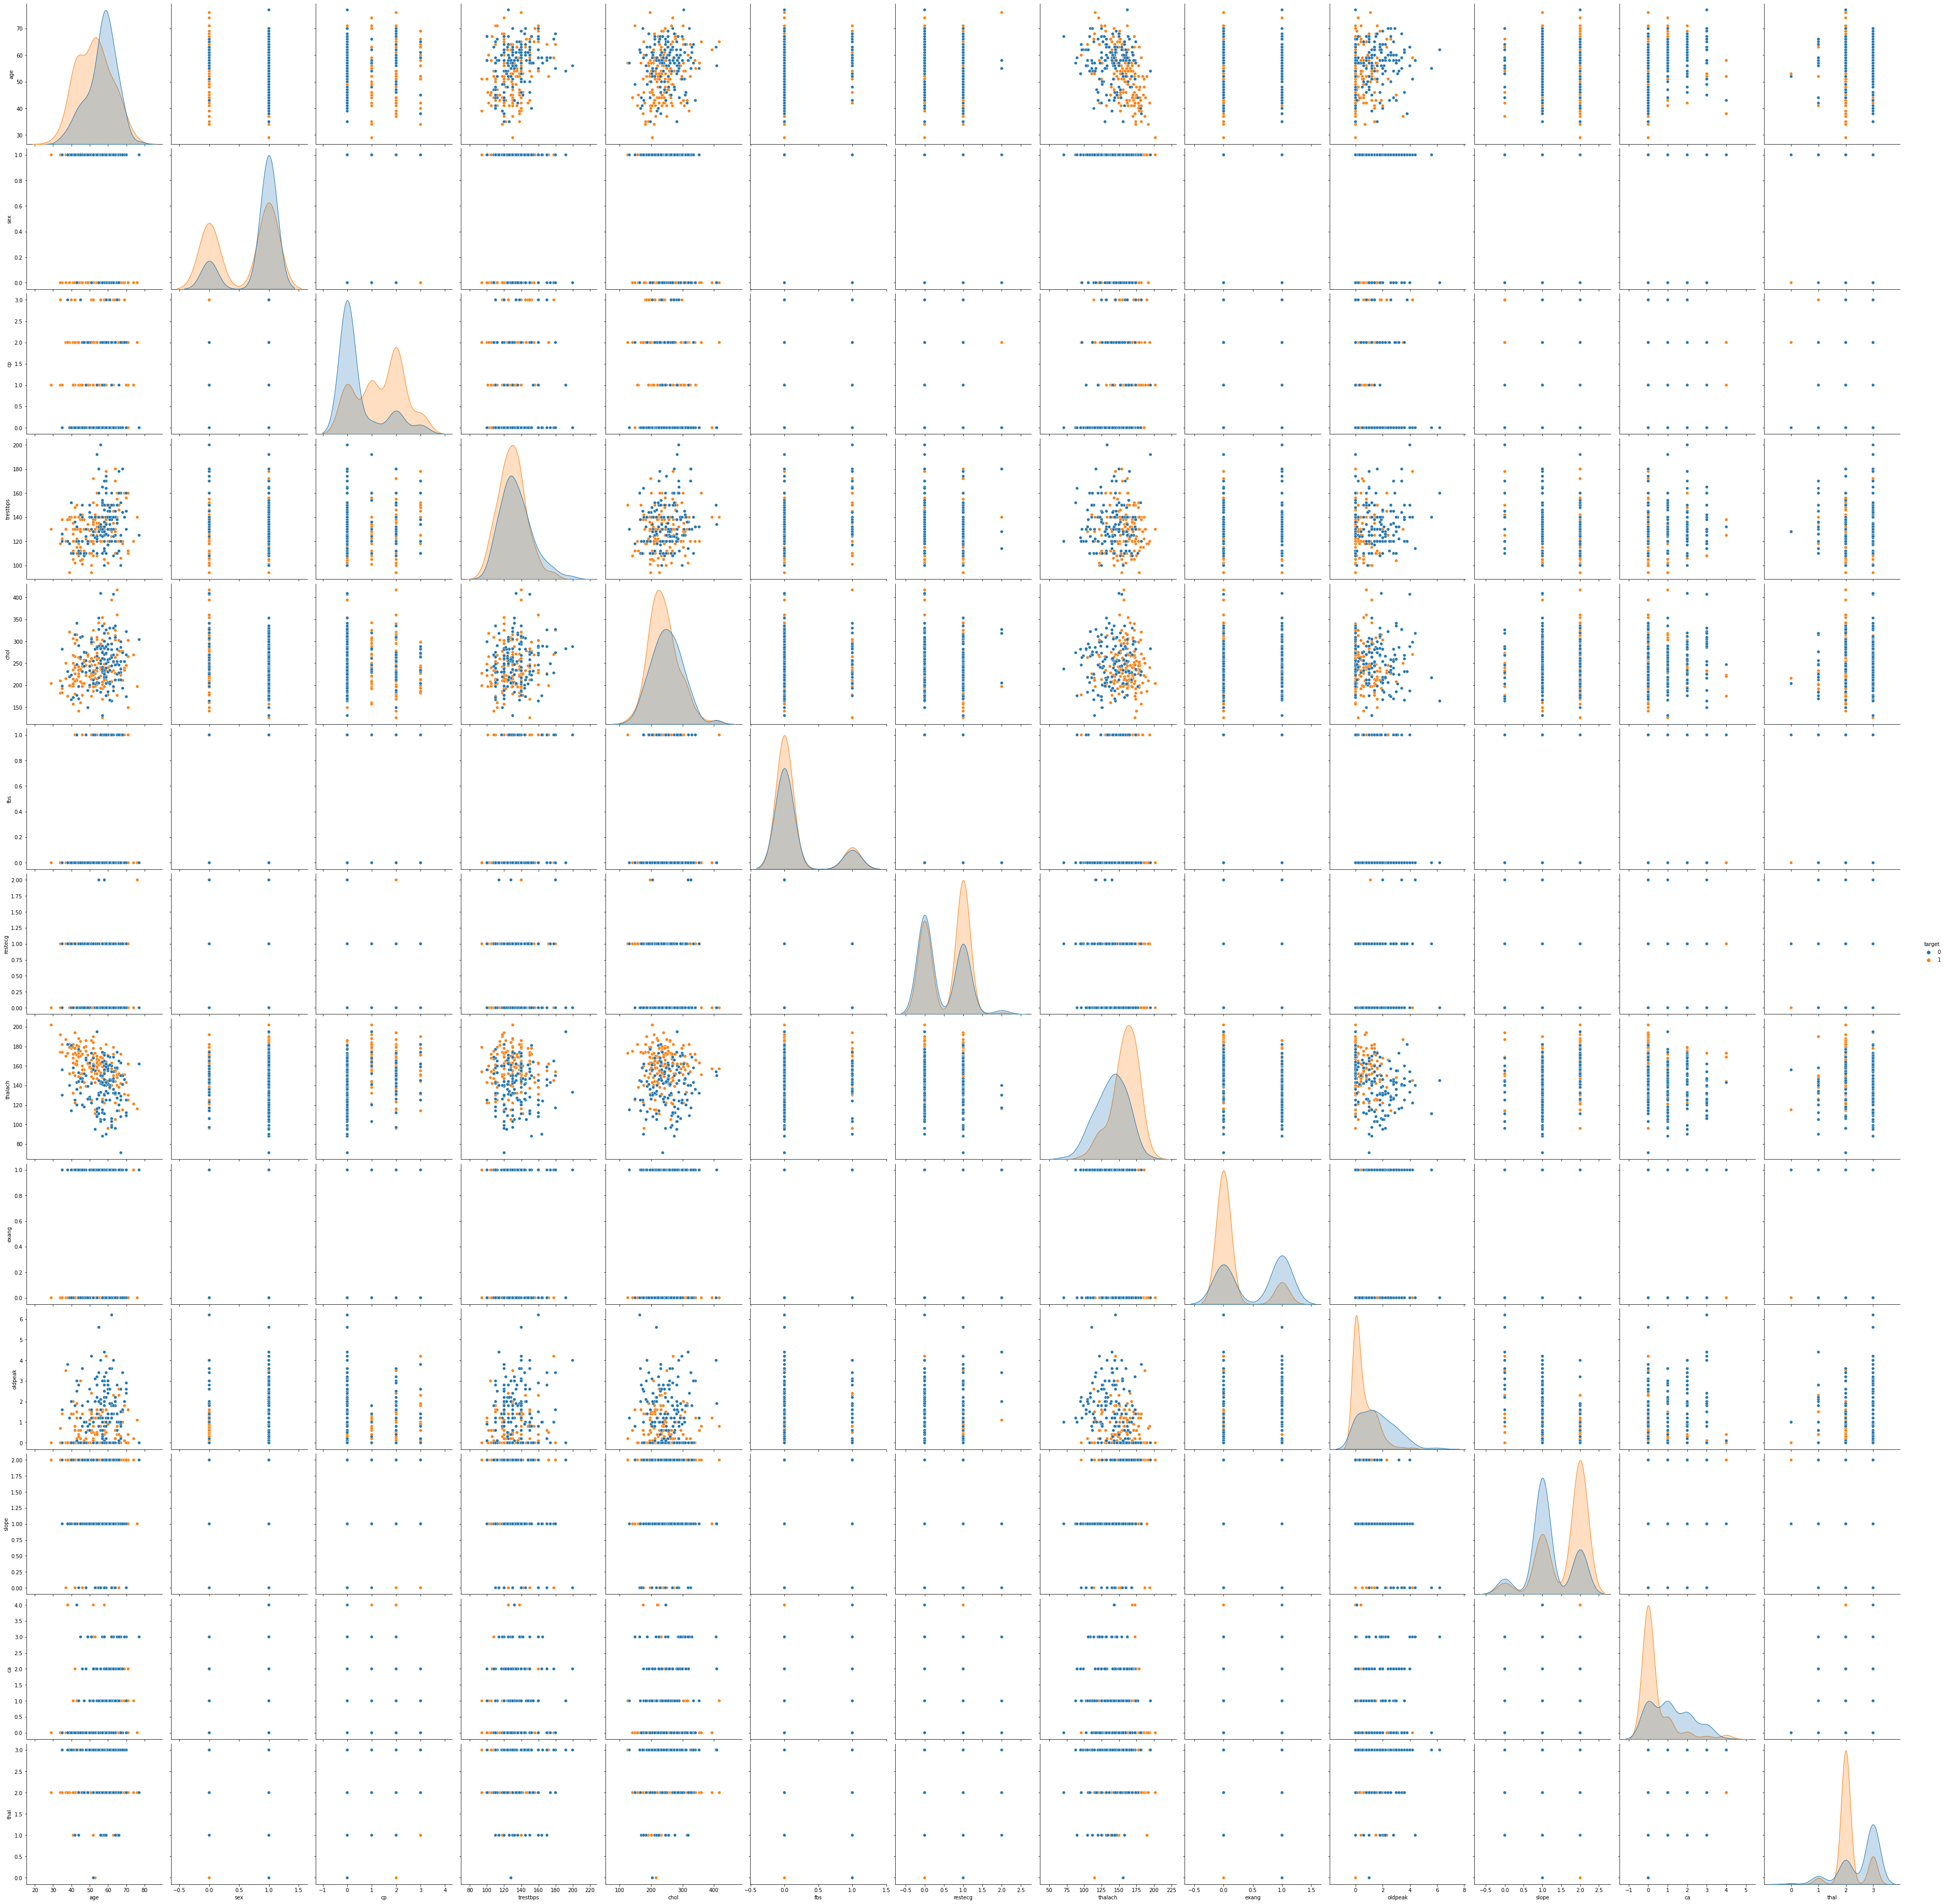

In [72]:
sns.pairplot(data=df, hue="target", height=4, aspect =1)

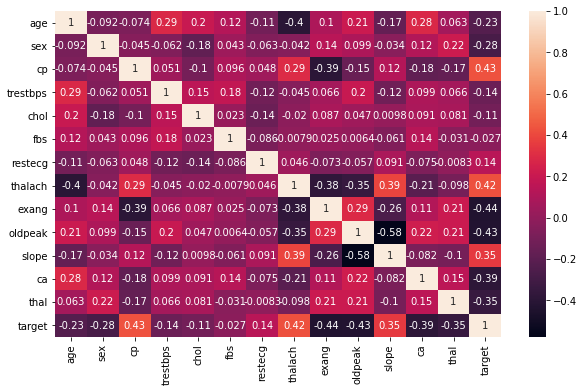

In [73]:
sns.heatmap(df.corr(), annot=True);

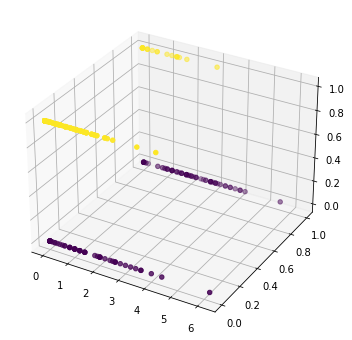

In [74]:
# kus bakisi görünümü sagliyor.
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #111 bir x, bir y, bir z ekseninden olusan grafik ciz
ax.scatter(df['oldpeak'], df['exang'], df['target'],c=df['target']); #renklendirme target a göre yapilmisitir.
# Feature lara 3 boyutlu bakinca verilerin ayri olarak görmüs olduk.

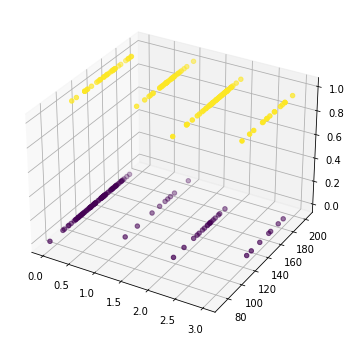

In [75]:
# kus bakisi görünümü sagliyor.
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #111 bir x, bir y, bir z ekseninden olusan grafik ciz
ax.scatter(df['cp'], df['thalach'], df['target'],c=df['target']); #renklendirme target a göre yapilmisitir.
# Feature lara 3 boyutlu bakinca verilerin ayri olarak görmüs olduk.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [78]:
X = df.drop('target',axis=1)
y = df['target']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
scaler = StandardScaler()

In [81]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [84]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [85]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [86]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [87]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.800,0.200
1,0.800,0.200
2,0.200,0.800
3,0.800,0.200
4,0.200,0.800
...,...,...
86,0.800,0.200
87,0.400,0.600
88,0.200,0.800
89,0.400,0.600


In [88]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [89]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
159,1,0,0.400,0.600
7,1,1,1.000,0.000
84,1,1,1.000,0.000
5,1,1,0.800,0.200
268,0,0,0.000,1.000
279,0,0,0.000,1.000
185,0,0,0.400,0.600
250,0,0,0.000,1.000
82,1,1,1.000,0.000
224,0,0,0.000,1.000


# Visually compare models based on your chosen metric

In [90]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [91]:
confusion_matrix(y_test, y_pred)

array([[34,  8],
       [ 8, 41]], dtype=int64)

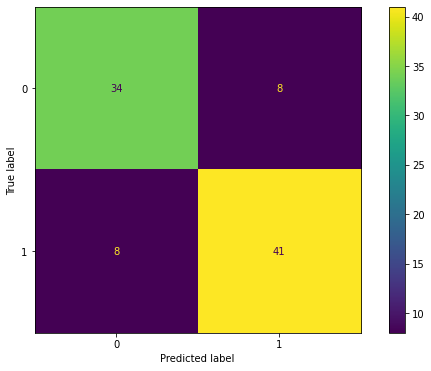

In [92]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [93]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34  8]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [94]:
y_train_pred = knn_model.predict(X_train_scaled)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[ 83  13]
 [ 10 105]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        96
           1       0.89      0.91      0.90       115

    accuracy                           0.89       211
   macro avg       0.89      0.89      0.89       211
weighted avg       0.89      0.89      0.89       211



In [95]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [96]:
test_error_rates = []


for k in range(1,30):  # k nin cok büyük olmasi  tercih edilmez. hesaplama maliyetinden dolayi 
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test) # datam dengeli oldugu icin accuracy alindi.
    
    test_error_rates.append(test_error)

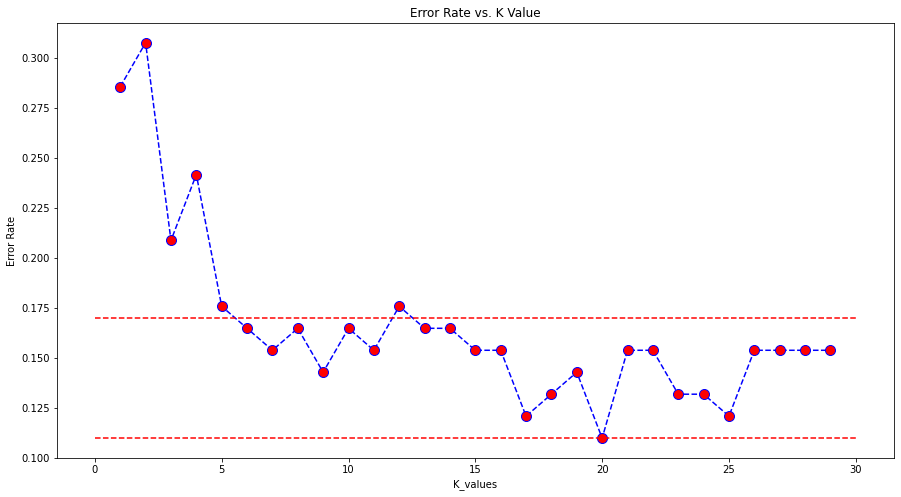

In [103]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.11, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #horizontal cizgi 
plt.hlines(y=0.17, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #horizontal cizgi 

In [104]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

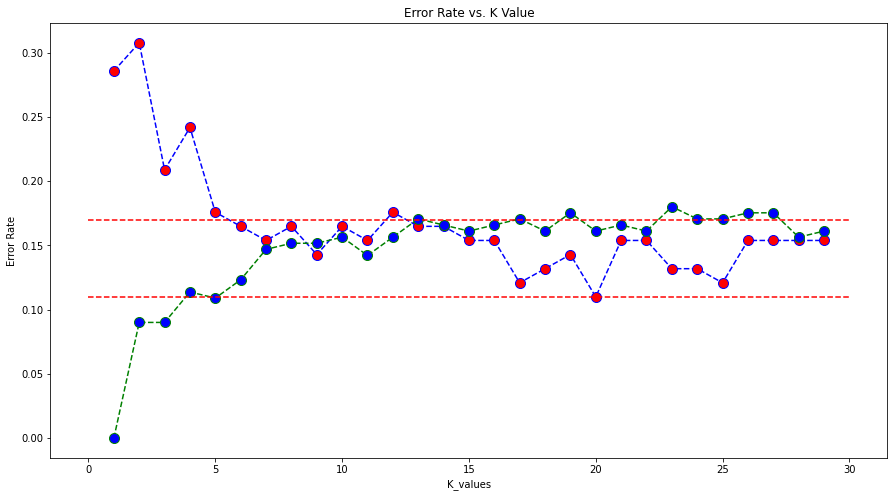

In [105]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.11, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.17, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [ ]:
# k =1 iken ucuruum var. ideal nokta 5 ile 10 arasi kirmizi nokta min oldugu yer k=7 


# Chose best model and make a random prediction 

In [106]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [107]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n') # 1 e göre 
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[32 10]
 [16 33]]
              precision    recall  f1-score   support

           0       0.67      0.76      0.71        42
           1       0.77      0.67      0.72        49

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91


Train_Set

[[ 96   0]
 [  0 115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       115

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [110]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train_scaled,y_train)
print('WITH K=30\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=30

Test_Set

[[32 10]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        42
           1       0.82      0.92      0.87        49

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91


Train_Set

[[ 73  23]
 [  9 106]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        96
           1       0.82      0.92      0.87       115

    accuracy                           0.85       211
   macro avg       0.86      0.84      0.84       211
weighted avg       0.85      0.85      0.85       211



In [109]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_scaled,y_train)
print('WITH K=7\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=7

Test_Set

[[35  7]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.86      0.86      0.86        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91


Train_Set

[[ 79  17]
 [ 14 101]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        96
           1       0.86      0.88      0.87       115

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211



In [111]:
from sklearn.model_selection import cross_val_score, cross_validate

In [112]:
model = KNeighborsClassifier(n_neighbors=7)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001,0.004,0.818,0.786,0.917,0.846
2,0.001,0.003,0.905,1.000,0.833,0.909
3,0.001,0.004,0.857,0.909,0.833,0.870
4,0.001,0.003,0.857,0.846,0.917,0.880
5,0.001,0.003,0.857,0.846,0.917,0.880
6,0.000,0.004,0.810,0.889,0.727,0.800
7,0.001,0.003,0.857,0.786,1.000,0.880
8,0.001,0.003,0.857,0.833,0.909,0.870
9,0.001,0.003,0.762,0.800,0.727,0.762
10,0.001,0.003,0.667,0.667,0.727,0.696


In [113]:
df_scores.mean()[2:]

test_accuracy    0.825
test_precision   0.836
test_recall      0.851
test_f1          0.839
dtype: float64

### Predict New Observation

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.000,54.325,9.068,29.000,47.250,55.000,61.000,77.000
sex,302.000,0.685,0.465,0.000,0.000,1.000,1.000,1.000
cp,302.000,0.964,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,302.000,131.679,17.541,94.000,120.000,130.000,140.000,200.000
chol,302.000,245.212,48.568,126.000,211.000,240.000,274.000,417.000
fbs,302.000,0.149,0.357,0.000,0.000,0.000,0.000,1.000
restecg,302.000,0.530,0.526,0.000,0.000,1.000,1.000,2.000
thalach,302.000,149.613,22.935,71.000,133.250,152.500,166.000,202.000
exang,302.000,0.328,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,302.000,1.038,1.163,0.000,0.000,0.800,1.600,6.200


In [119]:
new_observation = [[71, 1, 2, 155, 111, 333, 0, 1, 144, 1.2, 1, 2, 3]]

In [120]:
knn_model.predict(new_observation)

array([1], dtype=int64)

In [121]:
knn_model.predict_proba(new_observation)

array([[0.48275862, 0.51724138]])

In [122]:
new_observation_scaled = scaler.transform(new_observation) # scale ettim
new_observation_scaled

array([[ 1.91111889e+00,  6.97076390e-01,  9.30914633e-01,
         1.32241827e+00, -2.66403243e+00,  9.53106222e+02,
        -1.00766048e+00, -6.68258086e+00,  3.17001720e+02,
         1.64733563e-01, -6.63777688e-01,  1.25855810e+00,
         1.13306689e+00]])

In [123]:
knn_model.predict(new_observation_scaled)

array([1], dtype=int64)

In [124]:
knn_model.predict_proba(new_observation_scaled)

array([[0.37931034, 0.62068966]])